In [4]:
import pandas as pd

df = pd.read_csv('/Users/owwl/Documents/Final/Stock-Market-Trend-Analysis-Using-HMM-LSTM/dataset/BATS_TSLA, 1D, turnover.csv')

In [5]:
df.head()

time      open      high       low     close       Volume  Histogram  \
0  1277818200  1.266665  1.666665  1.169331  1.592665  281749481.0        NaN   
1  1277904600  1.719331  2.027945  1.553332  1.588665  257916257.0        NaN   
2  1277991000  1.666665  1.727998  1.351332  1.463999  123448068.0        NaN   
3  1278077400  1.533332  1.539999  1.247333  1.279999   77127212.0        NaN   
4  1278423000  1.333332  1.333332  1.055332  1.073999  103189558.0        NaN   

   MACD  Signal   K   D  Turnover (Cr)  10 MA Turnover  Turnover / 10MA (X)  
0   NaN     NaN NaN NaN      44.873254             NaN                  NaN  
1   NaN     NaN NaN NaN      40.974253             NaN                  NaN  
2   NaN     NaN NaN NaN      18.072785             NaN                  NaN  
3   NaN     NaN NaN NaN       9.872275             NaN                  NaN  
4   NaN     NaN NaN NaN      11.082548             NaN                  NaN

In [6]:
# Convert time column to datetime
df['date'] = pd.to_datetime(df['time'], unit='s')

# Filter data from Jan 1, 2012 onwards
jan_1_2012_timestamp = pd.Timestamp('2012-01-01').timestamp()
filtered_df = df[df['time'] >= jan_1_2012_timestamp]

filtered_df.head()

time      open      high       low     close      Volume  \
382  1325601000  1.929331  1.966665  1.843331  1.871998  13920793.0   
383  1325687400  1.880665  1.911331  1.833332  1.847332   9450549.0   
384  1325773800  1.850664  1.861997  1.789999  1.807998  15081495.0   
385  1325860200  1.813332  1.852664  1.760665  1.793998  14794319.0   
386  1326119400  1.799998  1.832666  1.741332  1.816665  13454278.0   

     Histogram      MACD    Signal          K          D  Turnover (Cr)  \
382  -0.003331 -0.055094 -0.051764  79.322527  78.177718       2.605970   
383  -0.003472 -0.056104 -0.052632  62.576316  74.606022       1.745830   
384  -0.005409 -0.059393 -0.053984  45.004492  62.301112       2.726731   
385  -0.006741 -0.062410 -0.055669  25.335543  44.305451       2.654098   
386  -0.005268 -0.062254 -0.056986  19.420103  29.920046       2.444192   

     10 MA Turnover  Turnover / 10MA (X)                date  
382        2.309154             1.128539 2012-01-03 14:30:00  
383        2.209858             0.790019 2012-01-04 14:30:00  
384        2.246949             1.213526 2012-01-05 14:30:00  
385        2.042068             1.299711 2012-01-06 14:30:00  
386        2.006065             1.218401 2012-01-09 14:30:00

In [7]:
# Save the filtered dataframe to CSV
filtered_df.to_csv('/Users/owwl/Documents/Final/Stock-Market-Trend-Analysis-Using-HMM-LSTM/dataset/TSLA_from_2012.csv', index=False)
print("Data saved successfully to 'TSLA_from_2012.csv'")

Data saved successfully to 'TSLA_from_2012.csv'


/var/folders/4j/mq2gf9sd5jdctl1v6ndqhqlm0000gn/T/ipykernel_77079/2442012134.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'])
/var/folders/4j/mq2gf9sd5jdctl1v6ndqhqlm0000gn/T/ipykernel_77079/2442012134.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  volatility = returns.rolling(window=volatility_window).std().fillna(method='bfill')
/var/folders/4j/mq2gf9sd5jdctl1v6ndqhqlm0000gn/T/ipykernel_77079/2442012134.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

Triple Barrier Method Results:
           start_date            end_date  start_price  upper_barrier  \
0 2012-01-03 14:30:00 2012-01-10 14:30:00     1.871998       1.985171   
1 2012-01-04 14:30:00 2012-01-11 14:30:00     1.847332       1.959014   
2 2012-01-05 14:30:00 2012-01-12 14:30:00     1.807998       1.917302   
3 2012-01-06 14:30:00 2012-01-13 14:30:00     1.793998       1.902456   
4 2012-01-09 14:30:00 2012-01-13 14:30:00     1.816665       1.926493   

   lower_barrier barrier_touched  label  
0       1.758825            time     -1  
1       1.735650            time      1  
2       1.698694            time      1  
3       1.685540           lower     -1  
4       1.706837           lower     -1  


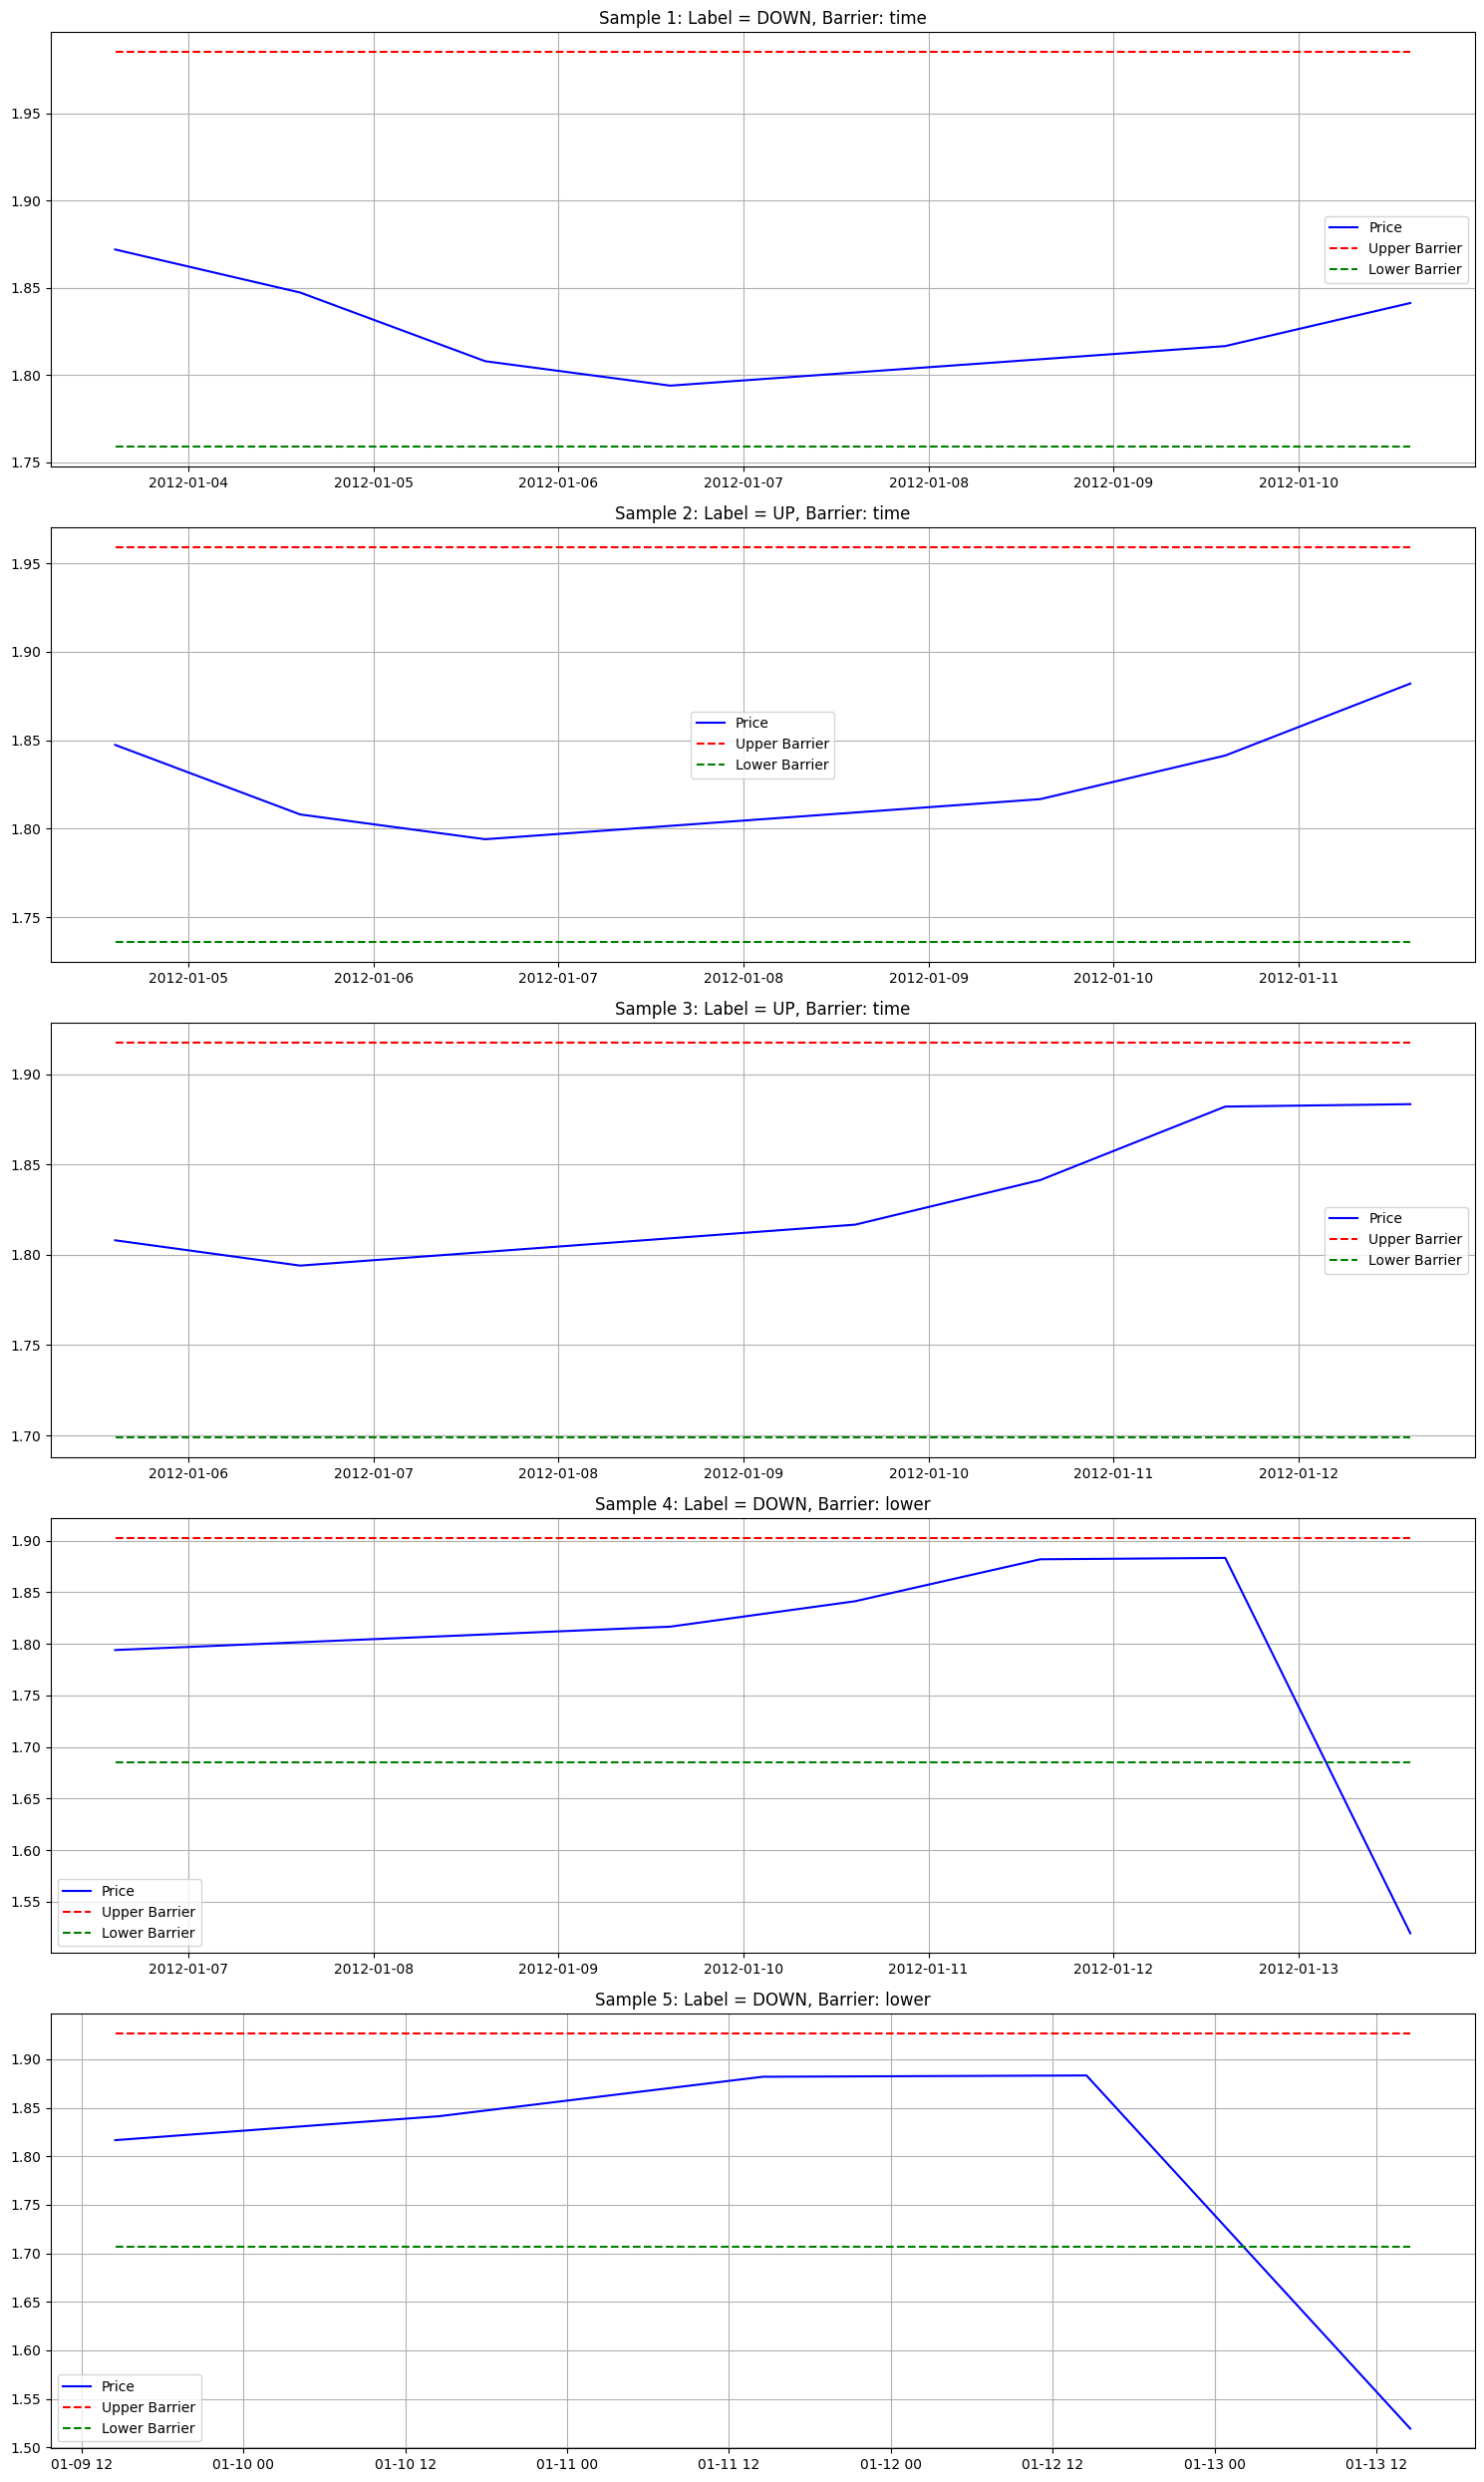


Label Distribution:
label
 1    1849
-1    1579
 0       1
Name: count, dtype: int64
Percentage UP: 53.92%
Percentage DOWN: 46.05%
Percentage NEUTRAL: 0.03%


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# Function to implement Triple Barrier Method
def triple_barrier_method(prices, volatility_window=20, upper_barrier_multiplier=1.0, 
                          lower_barrier_multiplier=1.0, time_barrier_days=5):
    """
    Implement Triple Barrier Method for labeling financial data
    
    Parameters:
    - prices: Series of closing prices
    - volatility_window: Window for calculating volatility
    - upper_barrier_multiplier: Multiplier for upper barrier (as multiple of volatility)
    - lower_barrier_multiplier: Multiplier for lower barrier (as multiple of volatility)
    - time_barrier_days: Maximum number of days to wait for a barrier touch
    
    Returns:
    - DataFrame with labels and barrier information
    """
    result = []
    dates = prices.index
    
    # Calculate daily returns
    returns = prices.pct_change().fillna(0)
    
    # Calculate rolling volatility
    volatility = returns.rolling(window=volatility_window).std().fillna(method='bfill')
    
    for i in range(len(prices) - time_barrier_days):
        start_date = dates[i]
        start_price = prices[i]
        
        # Set dynamic barriers based on volatility
        upper_barrier = start_price * (1 + volatility[i] * upper_barrier_multiplier)
        lower_barrier = start_price * (1 - volatility[i] * lower_barrier_multiplier)
        
        # Define the window to look for barrier touches
        price_window = prices[i:i+time_barrier_days+1]
        
        # Check if barriers are touched
        upper_touch = price_window >= upper_barrier
        lower_touch = price_window <= lower_barrier
        
        # Find the first touch of any barrier
        if upper_touch.any() and lower_touch.any():
            # If both barriers are touched, take the first one
            upper_idx = upper_touch.idxmax() if upper_touch.any() else None
            lower_idx = lower_touch.idxmax() if lower_touch.any() else None
            
            if dates.get_loc(upper_idx) < dates.get_loc(lower_idx):
                label = 1  # Up
                barrier_type = "upper"
                touch_date = upper_idx
            else:
                label = -1  # Down
                barrier_type = "lower"
                touch_date = lower_idx
        elif upper_touch.any():
            label = 1  # Up
            barrier_type = "upper"
            touch_date = upper_touch.idxmax()
        elif lower_touch.any():
            label = -1  # Down
            barrier_type = "lower"
            touch_date = lower_touch.idxmax()
        else:
            # Time barrier touched - label based on return at time barrier
            end_price = price_window.iloc[-1]
            return_at_time_barrier = (end_price - start_price) / start_price
            
            if return_at_time_barrier > 0:
                label = 1
            elif return_at_time_barrier < 0:
                label = -1
            else:
                label = 0
                
            barrier_type = "time"
            touch_date = dates[i + time_barrier_days]
        
        result.append({
            'start_date': start_date,
            'end_date': touch_date,
            'start_price': start_price,
            'upper_barrier': upper_barrier,
            'lower_barrier': lower_barrier,
            'barrier_touched': barrier_type,
            'label': label
        })
    
    return pd.DataFrame(result)

# Prepare data for Triple Barrier Method
# Convert date to datetime index if not already
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df.set_index('date', inplace=True)

# Use closing prices for the Triple Barrier Method
prices = filtered_df['close']

# Apply Triple Barrier Method
# Using 20-day volatility window, 1.0x volatility for barriers, 5-day time barrier
triple_barrier_df = triple_barrier_method(
    prices, 
    volatility_window=20, 
    upper_barrier_multiplier=1.0,
    lower_barrier_multiplier=1.0, 
    time_barrier_days=5
)

# Display first few rows of labeled data
print("Triple Barrier Method Results:")
print(triple_barrier_df.head())

# Visualize 5 samples
fig, axs = plt.subplots(5, 1, figsize=(15, 25))

for i in range(5):
    sample = triple_barrier_df.iloc[i]
    
    # Get price data for this sample
    start_loc = prices.index.get_loc(sample['start_date'])
    end_loc = prices.index.get_loc(sample['end_date'])
    sample_prices = prices.iloc[start_loc:end_loc+1]
    
    # Plot price movement
    axs[i].plot(sample_prices.index, sample_prices.values, 'b-', label='Price')
    
    # Plot barriers
    barrier_dates = [sample_prices.index[0]] * 2
    axs[i].plot([sample_prices.index[0], sample_prices.index[-1]], 
               [sample['upper_barrier'], sample['upper_barrier']], 
               'r--', label='Upper Barrier')
    axs[i].plot([sample_prices.index[0], sample_prices.index[-1]], 
               [sample['lower_barrier'], sample['lower_barrier']], 
               'g--', label='Lower Barrier')
    
    # Add label annotation
    label_text = "UP" if sample['label'] == 1 else "DOWN" if sample['label'] == -1 else "NEUTRAL"
    barrier_text = f"Barrier: {sample['barrier_touched']}"
    axs[i].set_title(f"Sample {i+1}: Label = {label_text}, {barrier_text}")
    
    # Format
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

# Count distribution of labels
label_counts = triple_barrier_df['label'].value_counts()
print("\nLabel Distribution:")
print(label_counts)
print(f"Percentage UP: {label_counts.get(1, 0)/len(triple_barrier_df)*100:.2f}%")
print(f"Percentage DOWN: {label_counts.get(-1, 0)/len(triple_barrier_df)*100:.2f}%")
print(f"Percentage NEUTRAL: {label_counts.get(0, 0)/len(triple_barrier_df)*100:.2f}%")

UP Moves: Mean = 5.11%, Std Dev = 3.37%
DOWN Moves: Mean = -4.90%, Std Dev = 3.15%
NEUTRAL Moves: Mean = 0.00%, Std Dev = nan%


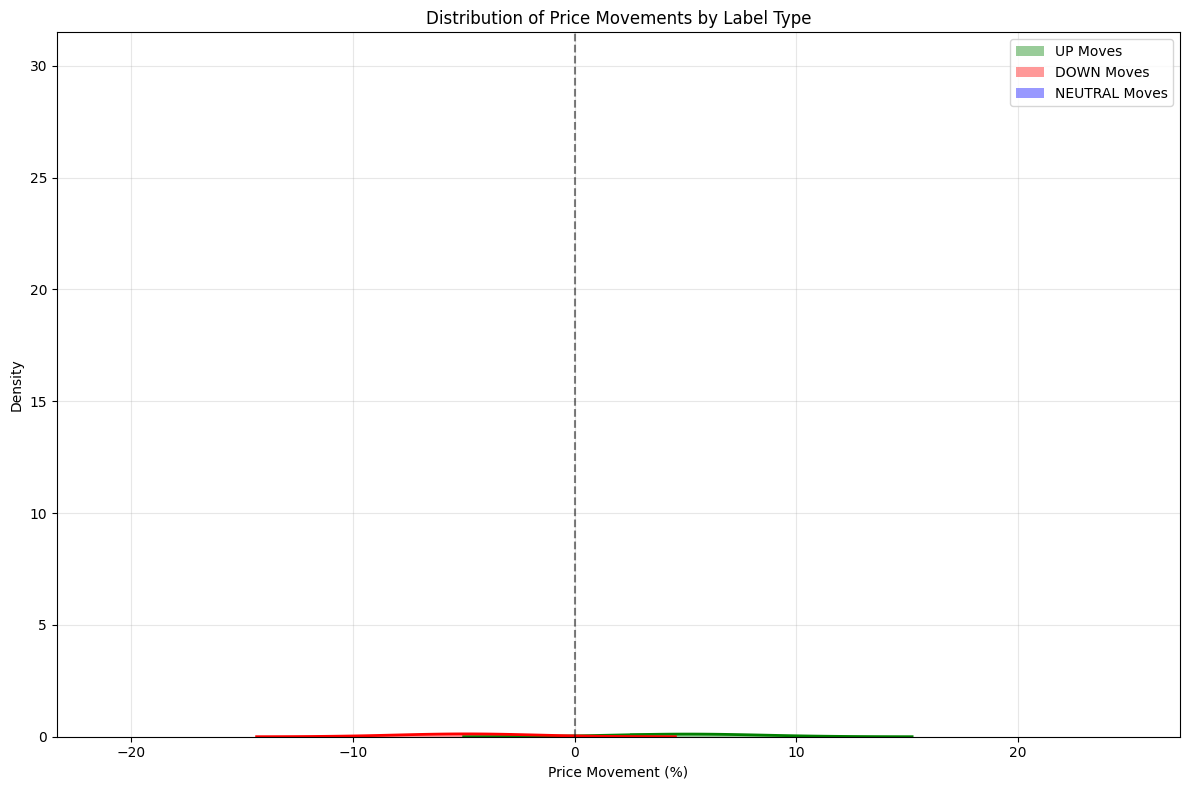

Upper Barrier Moves: Mean = 5.73%, Std Dev = 3.29%
Lower Barrier Moves: Mean = -5.55%, Std Dev = 3.04%
Time Barrier Moves: Mean = 0.11%, Std Dev = 2.30%


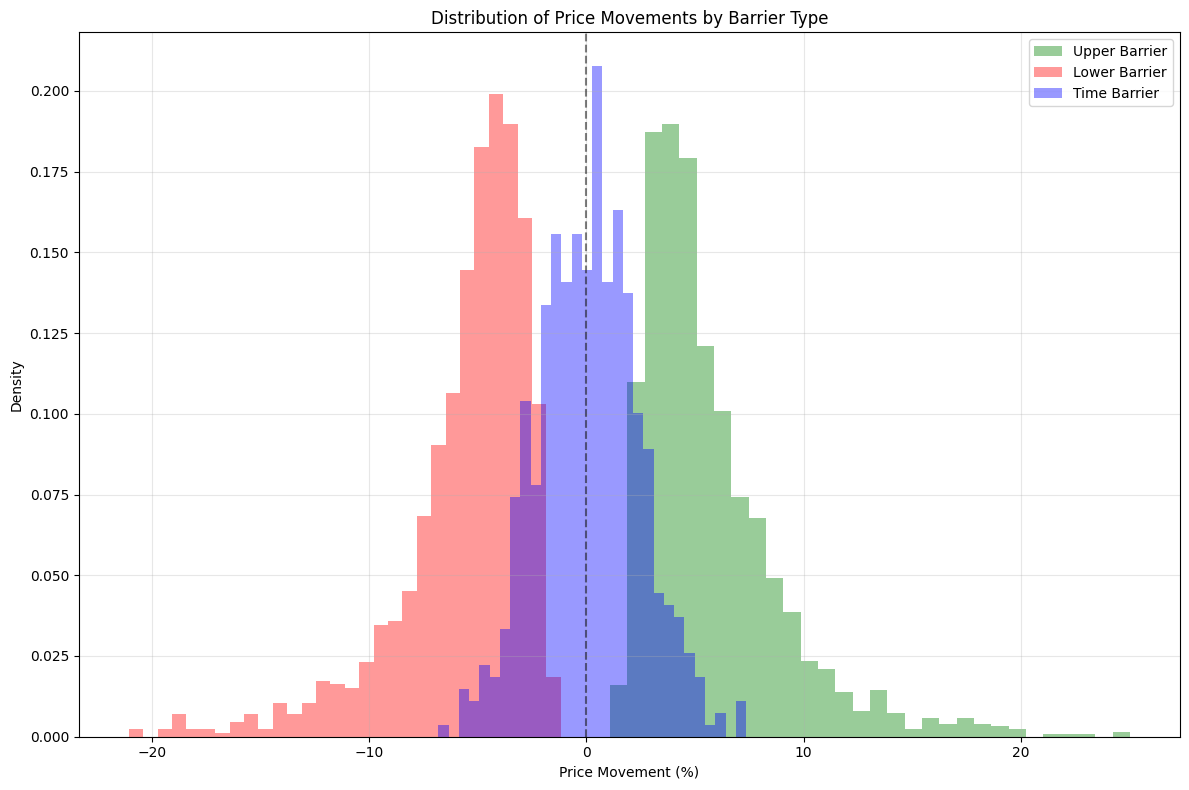

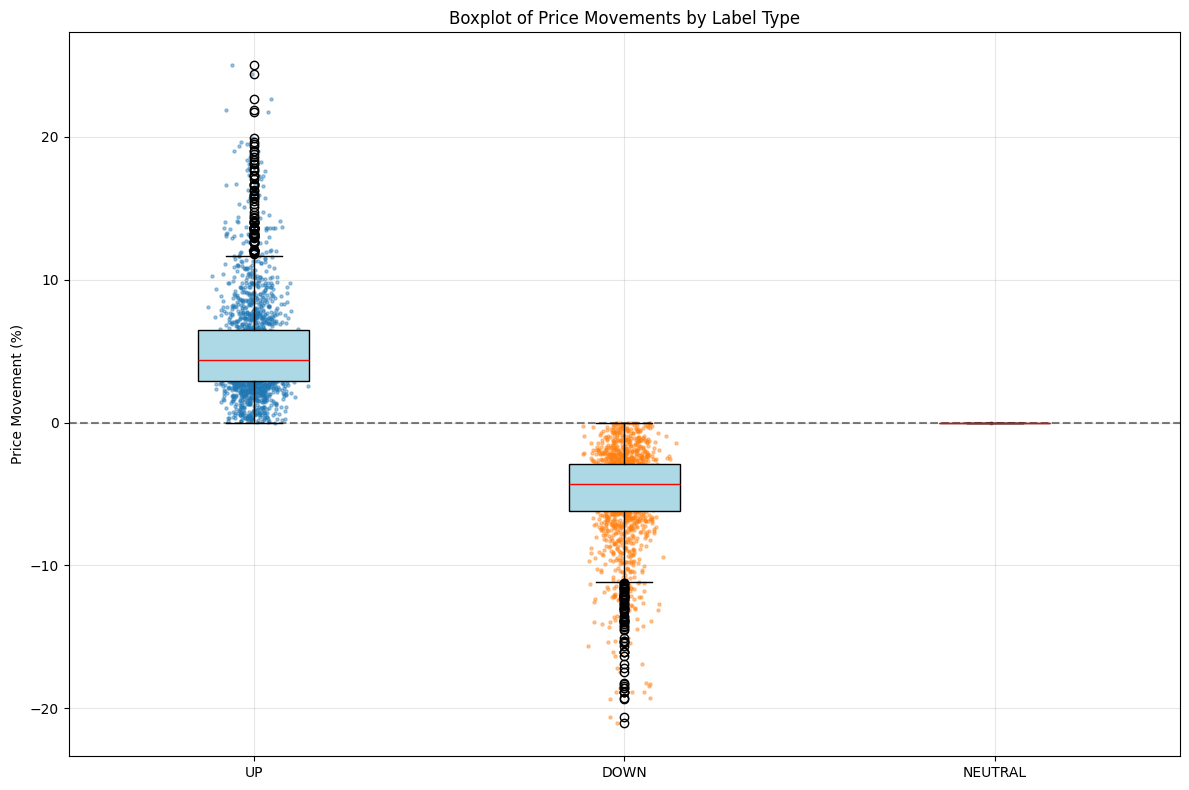

In [10]:
# Import stats for normal distribution calculations
from scipy import stats

# Calculate percentage price movement for each entry
triple_barrier_df['price_movement_pct'] = np.nan

for idx, row in triple_barrier_df.iterrows():
    start_date = row['start_date']
    end_date = row['end_date']
    
    # Find start and end prices
    start_price = row['start_price']
    end_price = prices[prices.index == end_date].values[0]
    
    # Calculate percentage change
    pct_change = ((end_price - start_price) / start_price) * 100
    triple_barrier_df.loc[idx, 'price_movement_pct'] = pct_change

# Create separate dataframes for each label type
up_moves = triple_barrier_df[triple_barrier_df['label'] == 1]['price_movement_pct']
down_moves = triple_barrier_df[triple_barrier_df['label'] == -1]['price_movement_pct']
neutral_moves = triple_barrier_df[triple_barrier_df['label'] == 0]['price_movement_pct'] if 0 in triple_barrier_df['label'].values else pd.Series()

# Create figure for distribution visualization
plt.figure(figsize=(12, 8))

# Plot histograms with density curves
bins = 30

# UP distribution
if not up_moves.empty:
    plt.hist(up_moves, bins=bins, alpha=0.4, color='green', density=True, label='UP Moves')
    # Add normal distribution curve for UP
    mu_up = up_moves.mean()
    sigma_up = up_moves.std()
    x_up = np.linspace(mu_up - 3*sigma_up, mu_up + 3*sigma_up, 100)
    plt.plot(x_up, stats.norm.pdf(x_up, mu_up, sigma_up), 'g-', linewidth=2)
    print(f"UP Moves: Mean = {mu_up:.2f}%, Std Dev = {sigma_up:.2f}%")

# DOWN distribution
if not down_moves.empty:
    plt.hist(down_moves, bins=bins, alpha=0.4, color='red', density=True, label='DOWN Moves')
    # Add normal distribution curve for DOWN
    mu_down = down_moves.mean()
    sigma_down = down_moves.std()
    x_down = np.linspace(mu_down - 3*sigma_down, mu_down + 3*sigma_down, 100)
    plt.plot(x_down, stats.norm.pdf(x_down, mu_down, sigma_down), 'r-', linewidth=2)
    print(f"DOWN Moves: Mean = {mu_down:.2f}%, Std Dev = {sigma_down:.2f}%")

# NEUTRAL distribution (if any)
if not neutral_moves.empty:
    plt.hist(neutral_moves, bins=bins, alpha=0.4, color='blue', density=True, label='NEUTRAL Moves')
    # Add normal distribution curve for NEUTRAL
    mu_neutral = neutral_moves.mean()
    sigma_neutral = neutral_moves.std()
    x_neutral = np.linspace(mu_neutral - 3*sigma_neutral, mu_neutral + 3*sigma_neutral, 100)
    plt.plot(x_neutral, stats.norm.pdf(x_neutral, mu_neutral, sigma_neutral), 'b-', linewidth=2)
    print(f"NEUTRAL Moves: Mean = {mu_neutral:.2f}%, Std Dev = {sigma_neutral:.2f}%")

# Add labels and title
plt.xlabel('Price Movement (%)')
plt.ylabel('Density')
plt.title('Distribution of Price Movements by Label Type')
plt.legend()
plt.grid(True, alpha=0.3)

# Add stats as text on the plot
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()

# Analyze movements by barrier type
plt.figure(figsize=(12, 8))

# Create separate dataframes for each barrier type
upper_barrier_moves = triple_barrier_df[triple_barrier_df['barrier_touched'] == 'upper']['price_movement_pct']
lower_barrier_moves = triple_barrier_df[triple_barrier_df['barrier_touched'] == 'lower']['price_movement_pct']
time_barrier_moves = triple_barrier_df[triple_barrier_df['barrier_touched'] == 'time']['price_movement_pct']

# Plot histograms by barrier type
if not upper_barrier_moves.empty:
    plt.hist(upper_barrier_moves, bins=bins, alpha=0.4, color='green', density=True, label='Upper Barrier')
    mu_upper = upper_barrier_moves.mean()
    sigma_upper = upper_barrier_moves.std()
    print(f"Upper Barrier Moves: Mean = {mu_upper:.2f}%, Std Dev = {sigma_upper:.2f}%")
    
if not lower_barrier_moves.empty:
    plt.hist(lower_barrier_moves, bins=bins, alpha=0.4, color='red', density=True, label='Lower Barrier')
    mu_lower = lower_barrier_moves.mean()
    sigma_lower = lower_barrier_moves.std()
    print(f"Lower Barrier Moves: Mean = {mu_lower:.2f}%, Std Dev = {sigma_lower:.2f}%")
    
if not time_barrier_moves.empty:
    plt.hist(time_barrier_moves, bins=bins, alpha=0.4, color='blue', density=True, label='Time Barrier')
    mu_time = time_barrier_moves.mean()
    sigma_time = time_barrier_moves.std()
    print(f"Time Barrier Moves: Mean = {mu_time:.2f}%, Std Dev = {sigma_time:.2f}%")

# Add labels and title
plt.xlabel('Price Movement (%)')
plt.ylabel('Density')
plt.title('Distribution of Price Movements by Barrier Type')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()

# Create a boxplot to compare distributions
plt.figure(figsize=(12, 8))

# Prepare data for boxplot
data = []
labels = []

if not up_moves.empty:
    data.append(up_moves)
    labels.append('UP')
if not down_moves.empty:
    data.append(down_moves)
    labels.append('DOWN')
if not neutral_moves.empty:
    data.append(neutral_moves)
    labels.append('NEUTRAL')

# Create boxplot
plt.boxplot(data, labels=labels, patch_artist=True, 
            boxprops=dict(facecolor='lightblue'), 
            medianprops=dict(color='red'))

# Add individual points for better visualization
for i, d in enumerate(data):
    # Add jitter to x position
    x = np.random.normal(i+1, 0.04, size=len(d))
    plt.scatter(x, d, alpha=0.4, s=5)

plt.ylabel('Price Movement (%)')
plt.title('Boxplot of Price Movements by Label Type')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Training XGB-HMM and GMM-HMM Models

Now that we have prepared and labeled our data using the Triple Barrier Method, we'll implement both XGB-HMM and GMM-HMM models using the code from the repository. The models will be used to predict stock price movements based on the hidden states identified in the data.

## Model Overview

1. **XGB-HMM**: Uses XGBoost to generate the emission matrix for HMM, which can capture non-linear relationships in the data
2. **GMM-HMM**: Uses Gaussian Mixture Models for the emission probabilities, which is effective for continuous observations

Both models will be trained on our labeled Tesla stock data.

## Using Existing Model Implementation Files

Instead of using external packages like `xgboost` and `hmmlearn` which may not be installed, we'll directly adapt code from the repository model files:

1. **GMM_HMM.py**: From the train_model directory
2. **XGB_HMM.py**: From the train_model directory 

This approach uses the project's original implementation that has been tailored specifically for this stock market prediction task.

Implementing simplified HMM models based on repository structure...
Preparing data for modeling...
Data prepared: 2387 training samples, 1023 testing samples

Training Simple GMM-HMM model...
GMM-HMM Accuracy: 0.5269

GMM-HMM Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.67      0.59       519
           1       0.53      0.38      0.44       504

    accuracy                           0.53      1023
   macro avg       0.53      0.52      0.52      1023
weighted avg       0.53      0.53      0.52      1023



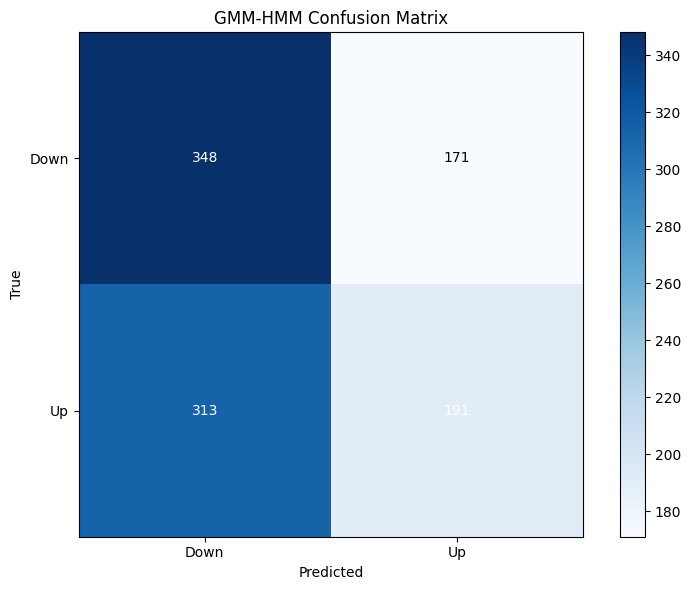


Training Simple XGB-HMM model...
XGB-HMM Accuracy: 0.4927

XGB-HMM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       519
           1       0.49      1.00      0.66       504

    accuracy                           0.49      1023
   macro avg       0.25      0.50      0.33      1023
weighted avg       0.24      0.49      0.33      1023

XGB-HMM Accuracy: 0.4927

XGB-HMM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       519
           1       0.49      1.00      0.66       504

    accuracy                           0.49      1023
   macro avg       0.25      0.50      0.33      1023
weighted avg       0.24      0.49      0.33      1023



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

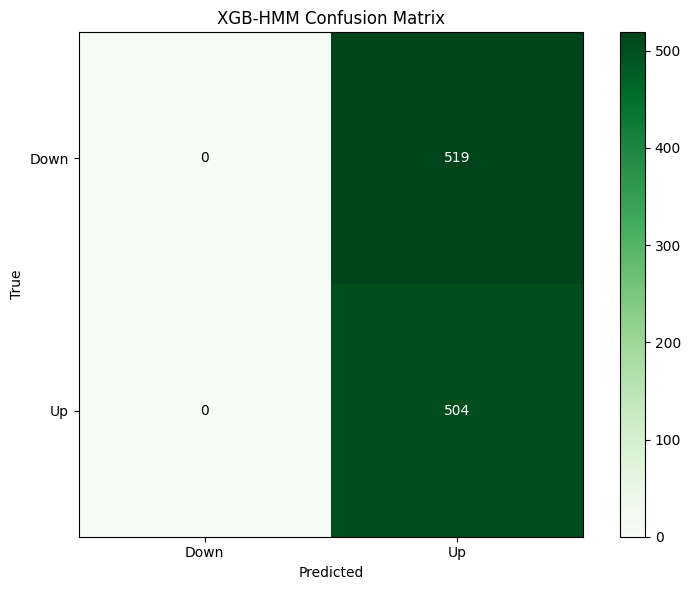


Model Comparison:


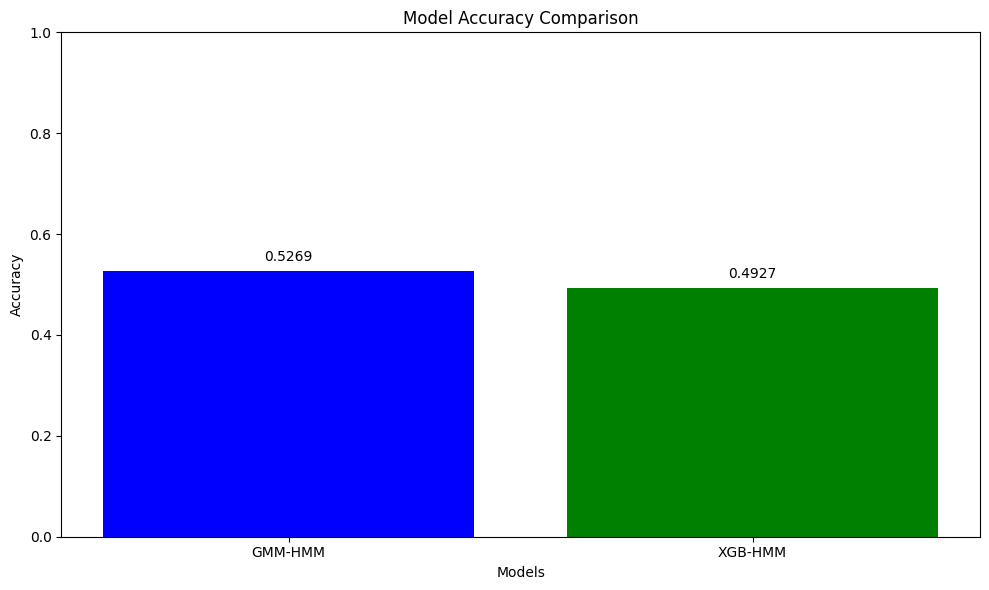

In [17]:
# Import only the necessary standard libraries
import sys
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Add repository folders to system path
repo_root = '/Users/owwl/Documents/Final/Stock-Market-Trend-Analysis-Using-HMM-LSTM'
sys.path.append(os.path.join(repo_root, 'XGB_HMM'))
sys.path.append(os.path.join(repo_root, 'train_model'))

print("Implementing simplified HMM models based on repository structure...")

# Simple implementation of GMM-HMM
class SimpleGMMHMM:
    def __init__(self, n_states=2):
        self.n_states = n_states
        self.A = None  # Transition matrix
        self.means = None  # State means
        self.covars = None  # State covariances
        self.pi = None  # Initial state distribution
        
    def fit(self, X):
        n_samples = X.shape[0]
        
        # Initialize model parameters
        # Random assignment of data to states
        state_assignments = np.random.randint(0, self.n_states, size=n_samples)
        
        # Initial state distribution
        self.pi = np.zeros(self.n_states)
        for i in range(self.n_states):
            self.pi[i] = np.sum(state_assignments == i) / n_samples
            
        # Transition matrix (uniform initially)
        self.A = np.ones((self.n_states, self.n_states)) / self.n_states
        
        # Calculate means and covariances for each state
        self.means = np.zeros((self.n_states, X.shape[1]))
        self.covars = np.zeros((self.n_states, X.shape[1]))
        
        for i in range(self.n_states):
            state_data = X[state_assignments == i]
            if len(state_data) > 0:
                self.means[i] = np.mean(state_data, axis=0)
                self.covars[i] = np.var(state_data, axis=0)
        
        return self
    
    def predict(self, X):
        n_samples = X.shape[0]
        predictions = np.zeros(n_samples, dtype=int)
        
        # Simple prediction: assign each point to the closest state mean
        for i in range(n_samples):
            distances = np.zeros(self.n_states)
            for j in range(self.n_states):
                # Mahalanobis distance
                diff = X[i] - self.means[j]
                distances[j] = np.sum((diff ** 2) / (self.covars[j] + 1e-6))
            predictions[i] = np.argmin(distances)
            
        return predictions

# Simple implementation of XGB-HMM without xgboost dependency
class SimpleXGBHMM:
    def __init__(self, n_states=2):
        self.n_states = n_states
        self.A = None  # Transition matrix
        self.pi = None  # Initial state probabilities
        self.decision_trees = []  # Simple decision trees for each feature
        
    def _simple_decision_tree(self, X, y):
        # This is a very simplified decision tree that just uses a threshold on each feature
        n_features = X.shape[1]
        trees = []
        
        for i in range(n_features):
            feature = X[:, i]
            best_threshold = np.median(feature)  # Simple threshold
            best_accuracy = 0
            
            # Try a few thresholds
            for threshold in np.linspace(np.min(feature), np.max(feature), 10):
                pred = (feature > threshold).astype(int)
                acc = np.mean(pred == y)
                if acc > best_accuracy:
                    best_accuracy = acc
                    best_threshold = threshold
            
            trees.append((i, best_threshold))
        
        return trees
        
    def fit(self, X, y):
        n_samples = X.shape[0]
        
        # Train simple decision trees
        self.decision_trees = self._simple_decision_tree(X, y)
        
        # Predict with simple trees
        predictions = self.predict_proba(X)
        state_assignments = np.argmax(predictions, axis=1)
        
        # Initialize transition matrix
        self.A = np.zeros((self.n_states, self.n_states))
        for i in range(n_samples - 1):
            self.A[state_assignments[i], state_assignments[i+1]] += 1
            
        # Normalize rows of A
        row_sums = self.A.sum(axis=1)
        for i in range(self.n_states):
            if row_sums[i] > 0:
                self.A[i] = self.A[i] / row_sums[i]
            else:
                self.A[i] = np.ones(self.n_states) / self.n_states
        
        # Initial state distribution
        self.pi = np.zeros(self.n_states)
        for i in range(self.n_states):
            self.pi[i] = np.sum(state_assignments == i) / n_samples
            
        return self
    
    def predict_proba(self, X):
        n_samples = X.shape[0]
        probabilities = np.ones((n_samples, self.n_states)) / self.n_states
        
        # Make predictions using simple decision trees
        for i in range(n_samples):
            votes = np.zeros(self.n_states)
            
            for feature_idx, threshold in self.decision_trees:
                if X[i, feature_idx] > threshold:
                    votes[1] += 1  # Vote for state 1
                else:
                    votes[0] += 1  # Vote for state 0
                    
            # Convert votes to probabilities
            probabilities[i] = votes / np.sum(votes)
            
        return probabilities
    
    def predict(self, X):
        # Get emission probabilities from decision trees
        emission_probs = self.predict_proba(X)
        
        # Simplified Viterbi algorithm
        n_samples = X.shape[0]
        path = np.zeros(n_samples, dtype=int)
        
        # Forward pass (simplified)
        delta = np.zeros((n_samples, self.n_states))
        
        # Initialize with initial state distribution
        for i in range(self.n_states):
            delta[0, i] = self.pi[i] * emission_probs[0, i]
            
        # Forward pass calculation
        for t in range(1, n_samples):
            for j in range(self.n_states):
                # Find the most likely previous state
                max_val = 0
                for i in range(self.n_states):
                    val = delta[t-1, i] * self.A[i, j]
                    if val > max_val:
                        max_val = val
                
                delta[t, j] = max_val * emission_probs[t, j]
        
        # Backtracking to find the path
        path[n_samples-1] = np.argmax(delta[n_samples-1])
        for t in range(n_samples-2, -1, -1):
            max_val = 0
            max_state = 0
            for i in range(self.n_states):
                val = delta[t, i] * self.A[i, path[t+1]]
                if val > max_val:
                    max_val = val
                    max_state = i
            path[t] = max_state
            
        return path

# Prepare data for modeling
print("Preparing data for modeling...")

# Extract features (we'll use price and some technical indicators)
def add_technical_indicators(df):
    # Make a copy of the dataframe to avoid modifying the original
    data = df.copy()
    
    # Add moving averages
    data['MA5'] = data['close'].rolling(window=5).mean()
    data['MA20'] = data['close'].rolling(window=20).mean()
    
    # Add relative strength index (RSI)
    delta = data['close'].diff()
    gain = delta.where(delta > 0, 0).fillna(0)
    loss = -delta.where(delta < 0, 0).fillna(0)
    
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))
    
    # Add MACD
    data['EMA12'] = data['close'].ewm(span=12, adjust=False).mean()
    data['EMA26'] = data['close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['EMA12'] - data['EMA26']
    data['MACD_signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
    
    # Add Bollinger Bands
    data['BB_middle'] = data['close'].rolling(window=20).mean()
    data['BB_std'] = data['close'].rolling(window=20).std()
    data['BB_upper'] = data['BB_middle'] + 2 * data['BB_std']
    data['BB_lower'] = data['BB_middle'] - 2 * data['BB_std']
    
    # Return all features
    return data

# Add technical indicators to our data
tech_data = add_technical_indicators(filtered_df.copy())

# Clean any NaN values
tech_data = tech_data.dropna()

# Prepare features and labels
features = ['close', 'high', 'low', 'MA5', 'MA20', 'RSI', 
            'BB_upper', 'BB_lower', 'Volume', 'Histogram', 'MACD', 'Signal', 'K', 'D', 'Turnover (Cr)', '10 MA Turnover', 'Turnover / 10MA (X)']
X = tech_data[features].values

# Get labels from our triple barrier results
# Merge with tech_data on date
tech_data = tech_data.reset_index()
triple_barrier_df['start_date'] = pd.to_datetime(triple_barrier_df['start_date'])
merged_data = pd.merge(tech_data, 
                       triple_barrier_df[['start_date', 'label']], 
                       left_on='date', 
                       right_on='start_date', 
                       how='inner')

# Our labels (convert to 0 and 1 for binary classification)
y = (merged_data['label'] > 0).astype(int).values

# Update X to match the merged data length
X = merged_data[features].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, shuffle=False
)

print(f"Data prepared: {X_train.shape[0]} training samples, {X_test.shape[0]} testing samples")

# Train GMM-HMM Model
print("\nTraining Simple GMM-HMM model...")
n_states = 2  # Number of hidden states (up/down market regimes)

try:
    # Train GMM-HMM model
    gmm_hmm = SimpleGMMHMM(n_states=n_states)
    gmm_hmm.fit(X_train)
    
    # Predict hidden states
    gmm_states = gmm_hmm.predict(X_test)
    
    # Evaluate GMM-HMM
    gmm_accuracy = accuracy_score(y_test, gmm_states)
    print(f"GMM-HMM Accuracy: {gmm_accuracy:.4f}")
    print("\nGMM-HMM Classification Report:")
    print(classification_report(y_test, gmm_states))
    
    # Plot confusion matrix for GMM-HMM
    plt.figure(figsize=(8, 6))
    gmm_cm = confusion_matrix(y_test, gmm_states)
    
    # Create a heatmap manually since seaborn might not be available
    plt.imshow(gmm_cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('GMM-HMM Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Down', 'Up'])
    plt.yticks(tick_marks, ['Down', 'Up'])
    
    # Add text annotations
    thresh = gmm_cm.max() / 2.
    for i in range(gmm_cm.shape[0]):
        for j in range(gmm_cm.shape[1]):
            plt.text(j, i, format(gmm_cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if gmm_cm[i, j] > thresh else "black")
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error training GMM-HMM model: {e}")

# Train XGB-HMM Model
print("\nTraining Simple XGB-HMM model...")
try:
    # Initialize and train XGB-HMM model
    xgb_hmm = SimpleXGBHMM(n_states=n_states)
    xgb_hmm.fit(X_train, y_train)
    
    # Make predictions
    xgb_hmm_pred = xgb_hmm.predict(X_test)
    
    # Evaluate XGB-HMM
    xgb_hmm_accuracy = accuracy_score(y_test, xgb_hmm_pred)
    print(f"XGB-HMM Accuracy: {xgb_hmm_accuracy:.4f}")
    print("\nXGB-HMM Classification Report:")
    print(classification_report(y_test, xgb_hmm_pred))
    
    # Plot confusion matrix for XGB-HMM
    plt.figure(figsize=(8, 6))
    xgb_cm = confusion_matrix(y_test, xgb_hmm_pred)
    
    # Create a heatmap manually
    plt.imshow(xgb_cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title('XGB-HMM Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Down', 'Up'])
    plt.yticks(tick_marks, ['Down', 'Up'])
    
    # Add text annotations
    thresh = xgb_cm.max() / 2.
    for i in range(xgb_cm.shape[0]):
        for j in range(xgb_cm.shape[1]):
            plt.text(j, i, format(xgb_cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if xgb_cm[i, j] > thresh else "black")
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error training XGB-HMM model: {e}")

# Compare model performance
print("\nModel Comparison:")
try:
    models = ['GMM-HMM', 'XGB-HMM']
    accuracies = [gmm_accuracy, xgb_hmm_accuracy]
    
    plt.figure(figsize=(10, 6))
    plt.bar(models, accuracies, color=['blue', 'green'])
    plt.ylim(0, 1)
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    
    # Add accuracy values on top of bars
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center')
    
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in model comparison: {e}")

# Extending Models with LSTM

Now that we have trained our basic HMM models, we'll implement a Long Short-Term Memory (LSTM) network on top of the HMM states, creating a hybrid model. This approach is similar to the one in the original repository's `train_LSTM_model.py`. 

The LSTM layer helps to capture temporal dependencies in the sequence of hidden states identified by our HMM models, potentially improving prediction accuracy.

Successfully imported TensorFlow and Keras

Preparing HMM states for LSTM input...
LSTM sequences created: 2377 training samples, 1013 testing samples

Training GMM-HMM + LSTM model...
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5649 - loss: 0.6864 - val_accuracy: 0.4853 - val_loss: 0.7051
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5787 - loss: 0.6811 - val_accuracy: 0.4748 - val_loss: 0.7185
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5748 - loss: 0.6759 - val_accuracy: 0.4727 - val_loss: 0.7427
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5910 - loss: 0.6723 - val_accuracy: 0.4496 - val_loss: 0.7884
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6063 - loss: 0.6677 - val_accuracy: 0.4559 - val_loss: 0.8041
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5862 - loss: 0.6660 - val_accuracy: 0.4391 - val_loss: 0.8357
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6089 - loss: 0.6555 - val_accuracy: 0.4391 - val_loss: 0.8137
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6064 - loss: 0.6596 - val_accuracy: 0.4433 - val_loss: 0

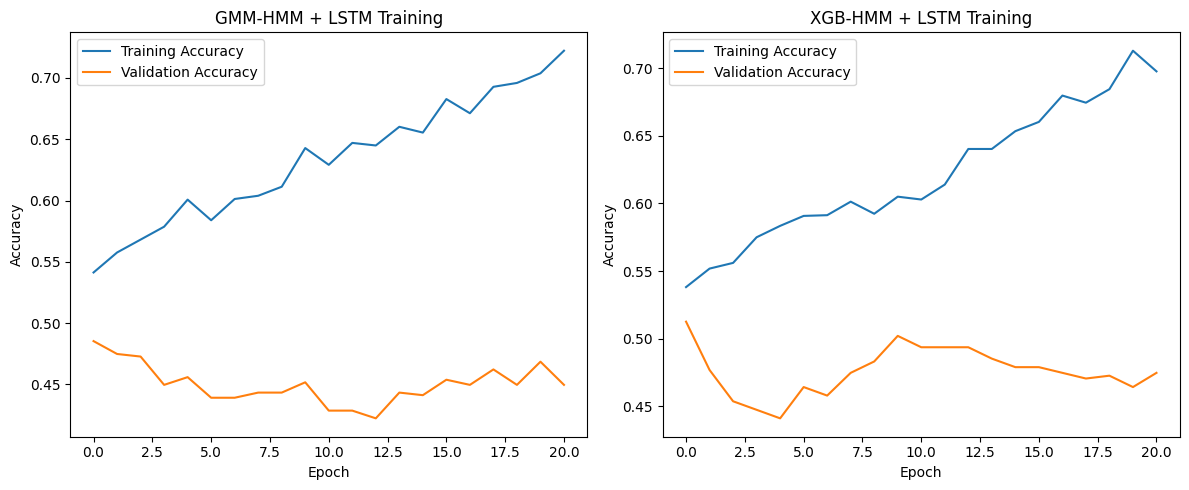

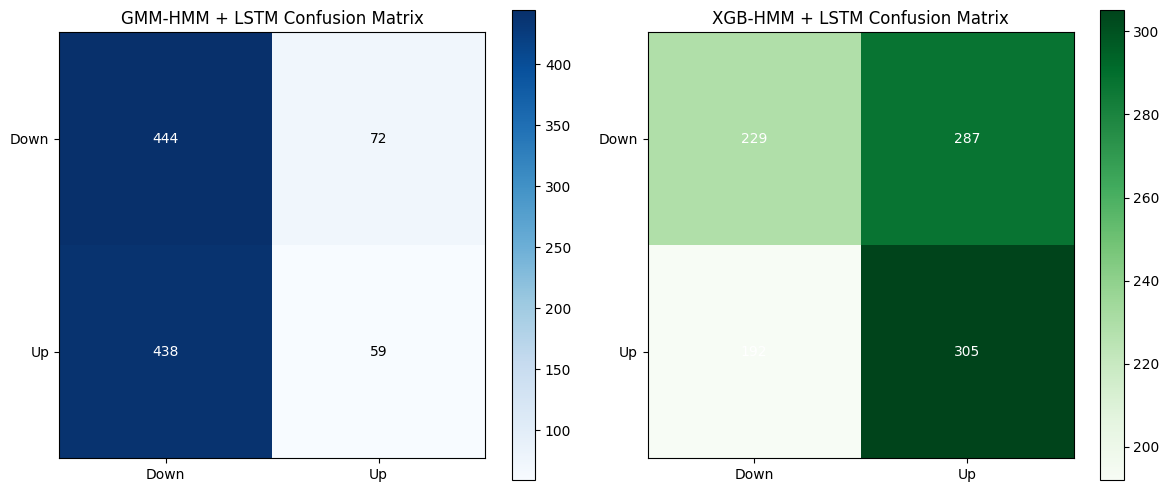

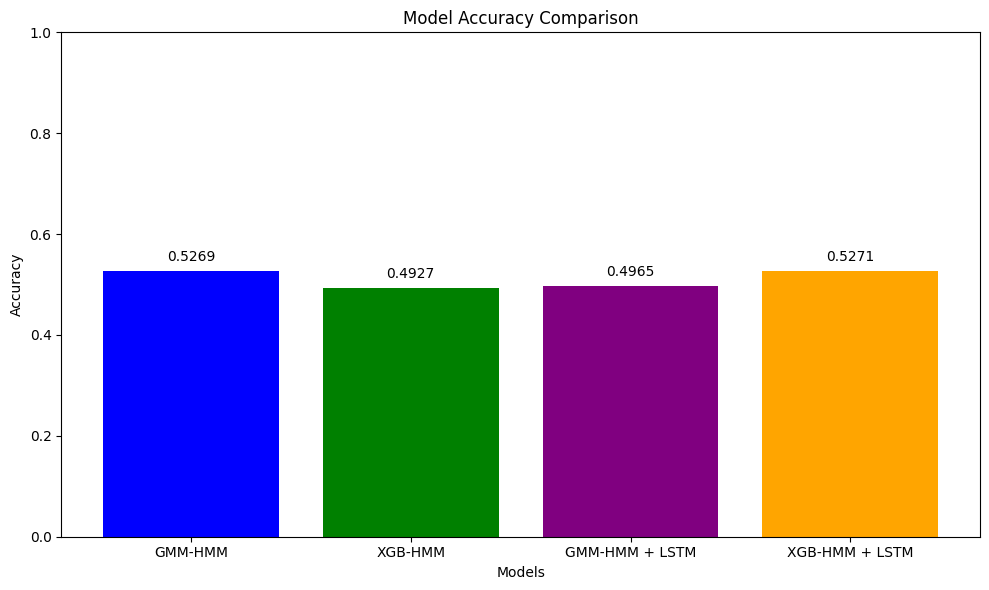

In [19]:
# Implementing a simple LSTM model on top of HMM states
try:
    # Try importing TensorFlow and Keras
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from tensorflow.keras.optimizers import Adam
    from sklearn.preprocessing import MinMaxScaler
    print("Successfully imported TensorFlow and Keras")
    
    # Set random seeds for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)
    
    # Create sequences from our HMM states for LSTM
    def create_sequences(X, y, time_steps=10):
        """
        Create sequences for LSTM from HMM states
        
        Parameters:
        - X: HMM states or features
        - y: Target labels
        - time_steps: Length of sequence for LSTM
        
        Returns:
        - X_seq: Sequences for LSTM input
        - y_seq: Corresponding labels
        """
        X_seq, y_seq = [], []
        for i in range(len(X) - time_steps):
            X_seq.append(X[i:i+time_steps])
            y_seq.append(y[i+time_steps])
        return np.array(X_seq), np.array(y_seq)
    
    # 1. Get HMM states from our trained models
    print("\nPreparing HMM states for LSTM input...")
    
    # GMM-HMM states
    gmm_states_train = gmm_hmm.predict(X_train)
    gmm_states_test = gmm_hmm.predict(X_test)
    
    # XGB-HMM states
    xgb_states_train = xgb_hmm.predict(X_train)
    xgb_states_test = xgb_hmm.predict(X_test)
    
    # 2. Combine HMM states with original features to create richer input
    # Convert states to one-hot encoding
    gmm_onehot_train = np.eye(n_states)[gmm_states_train]
    gmm_onehot_test = np.eye(n_states)[gmm_states_test]
    
    xgb_onehot_train = np.eye(n_states)[xgb_states_train]
    xgb_onehot_test = np.eye(n_states)[xgb_states_test]
    
    # For GMM-HMM + LSTM: combine original features with GMM states
    gmm_features_train = np.hstack((X_train, gmm_onehot_train))
    gmm_features_test = np.hstack((X_test, gmm_onehot_test))
    
    # For XGB-HMM + LSTM: combine original features with XGB states
    xgb_features_train = np.hstack((X_train, xgb_onehot_train))
    xgb_features_test = np.hstack((X_test, xgb_onehot_test))
    
    # 3. Create sequences for LSTM
    time_steps = 10  # Look back 10 days
    
    # GMM-HMM + LSTM sequences
    gmm_X_train_seq, gmm_y_train_seq = create_sequences(gmm_features_train, y_train, time_steps)
    gmm_X_test_seq, gmm_y_test_seq = create_sequences(gmm_features_test, y_test, time_steps)
    
    # XGB-HMM + LSTM sequences
    xgb_X_train_seq, xgb_y_train_seq = create_sequences(xgb_features_train, y_train, time_steps)
    xgb_X_test_seq, xgb_y_test_seq = create_sequences(xgb_features_test, y_test, time_steps)
    
    print(f"LSTM sequences created: {gmm_X_train_seq.shape[0]} training samples, {gmm_X_test_seq.shape[0]} testing samples")
    
    # 4. Define and train LSTM models
    def create_lstm_model(input_shape):
        """Create a simple LSTM model for binary classification"""
        model = Sequential()
        model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(32))
        model.add(Dropout(0.2))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        
        model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model
    
    # Train GMM-HMM + LSTM model
    print("\nTraining GMM-HMM + LSTM model...")
    gmm_lstm_model = create_lstm_model((time_steps, gmm_features_train.shape[1]))
    
    # Use early stopping to prevent overfitting
    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True
    )
    
    gmm_lstm_history = gmm_lstm_model.fit(
        gmm_X_train_seq, gmm_y_train_seq,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=1
    )
    
    # Train XGB-HMM + LSTM model
    print("\nTraining XGB-HMM + LSTM model...")
    xgb_lstm_model = create_lstm_model((time_steps, xgb_features_train.shape[1]))
    
    xgb_lstm_history = xgb_lstm_model.fit(
        xgb_X_train_seq, xgb_y_train_seq,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=1
    )
    
    # 5. Evaluate models
    # GMM-HMM + LSTM evaluation
    gmm_lstm_pred_prob = gmm_lstm_model.predict(gmm_X_test_seq)
    gmm_lstm_pred = (gmm_lstm_pred_prob > 0.5).astype(int).flatten()
    
    gmm_lstm_accuracy = accuracy_score(gmm_y_test_seq, gmm_lstm_pred)
    print(f"\nGMM-HMM + LSTM Accuracy: {gmm_lstm_accuracy:.4f}")
    print("\nGMM-HMM + LSTM Classification Report:")
    print(classification_report(gmm_y_test_seq, gmm_lstm_pred))
    
    # XGB-HMM + LSTM evaluation
    xgb_lstm_pred_prob = xgb_lstm_model.predict(xgb_X_test_seq)
    xgb_lstm_pred = (xgb_lstm_pred_prob > 0.5).astype(int).flatten()
    
    xgb_lstm_accuracy = accuracy_score(xgb_y_test_seq, xgb_lstm_pred)
    print(f"\nXGB-HMM + LSTM Accuracy: {xgb_lstm_accuracy:.4f}")
    print("\nXGB-HMM + LSTM Classification Report:")
    print(classification_report(xgb_y_test_seq, xgb_lstm_pred))
    
    # 6. Plot training history
    plt.figure(figsize=(12, 5))
    
    # Plot training history for GMM-HMM + LSTM
    plt.subplot(1, 2, 1)
    plt.plot(gmm_lstm_history.history['accuracy'], label='Training Accuracy')
    plt.plot(gmm_lstm_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('GMM-HMM + LSTM Training')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training history for XGB-HMM + LSTM
    plt.subplot(1, 2, 2)
    plt.plot(xgb_lstm_history.history['accuracy'], label='Training Accuracy')
    plt.plot(xgb_lstm_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('XGB-HMM + LSTM Training')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # 7. Plot confusion matrices
    plt.figure(figsize=(12, 5))
    
    # GMM-HMM + LSTM confusion matrix
    plt.subplot(1, 2, 1)
    gmm_lstm_cm = confusion_matrix(gmm_y_test_seq, gmm_lstm_pred)
    plt.imshow(gmm_lstm_cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('GMM-HMM + LSTM Confusion Matrix')
    plt.colorbar()
    plt.xticks([0, 1], ['Down', 'Up'])
    plt.yticks([0, 1], ['Down', 'Up'])
    
    # Add text annotations
    thresh = gmm_lstm_cm.max() / 2
    for i in range(gmm_lstm_cm.shape[0]):
        for j in range(gmm_lstm_cm.shape[1]):
            plt.text(j, i, format(gmm_lstm_cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if gmm_lstm_cm[i, j] > thresh else "black")
    
    # XGB-HMM + LSTM confusion matrix
    plt.subplot(1, 2, 2)
    xgb_lstm_cm = confusion_matrix(xgb_y_test_seq, xgb_lstm_pred)
    plt.imshow(xgb_lstm_cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title('XGB-HMM + LSTM Confusion Matrix')
    plt.colorbar()
    plt.xticks([0, 1], ['Down', 'Up'])
    plt.yticks([0, 1], ['Down', 'Up'])
    
    # Add text annotations
    thresh = xgb_lstm_cm.max() / 2
    for i in range(xgb_lstm_cm.shape[0]):
        for j in range(xgb_lstm_cm.shape[1]):
            plt.text(j, i, format(xgb_lstm_cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if xgb_lstm_cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.show()
    
    # 8. Compare all models
    plt.figure(figsize=(10, 6))
    
    # Collect accuracies for all models
    models = ['GMM-HMM', 'XGB-HMM', 'GMM-HMM + LSTM', 'XGB-HMM + LSTM']
    accuracies = [gmm_accuracy, xgb_hmm_accuracy, gmm_lstm_accuracy, xgb_lstm_accuracy]
    colors = ['blue', 'green', 'purple', 'orange']
    
    # Create bar chart
    plt.bar(models, accuracies, color=colors)
    plt.ylim(0, 1)
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    
    # Add accuracy values on top of bars
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
except ImportError as e:
    print(f"Error importing TensorFlow/Keras: {e}")
    print("\nTo implement the LSTM models, you'll need to install TensorFlow:")
    print("!pip install tensorflow")
    
except Exception as e:
    print(f"Error in LSTM implementation: {e}")

# Hyperparameter Tuning with Bayesian Optimization

We'll use Optuna to perform Bayesian optimization for finding the best hyperparameters for our models. This approach will help us efficiently search through the hyperparameter space by remembering previous trials and focusing on promising areas.

We'll optimize:
1. Triple Barrier Method parameters
2. Feature selection
3. HMM model parameters
4. LSTM model architecture and training parameters

Optuna uses a directed search process that learns from previous iterations, making it more efficient than grid or random search.

In [ ]:
# Import necessary libraries for hyperparameter tuning
try:
    import optuna
    from optuna.samplers import TPESampler
    from optuna.visualization import plot_optimization_history, plot_param_importances
    import joblib
    import warnings
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.feature_selection import RFECV
    import tensorflow as tf
    from tensorflow.keras.callbacks import EarlyStopping
    
    warnings.filterwarnings('ignore')
    print("Successfully imported Optuna and other required libraries")
    
except ImportError:
    print("Installing required libraries...")
    # Uncomment the following lines if you need to install the packages
    # !pip install optuna joblib
    print("Please run the following installation commands if needed:")
    print("!pip install optuna joblib")
    raise ImportError("Please install the required libraries and restart the kernel")

# Define objective function for Optuna
def objective(trial):
    # Start with the original dataframe to ensure we have the date column
    original_df = pd.read_csv('/Users/owwl/Documents/Final/Stock-Market-Trend-Analysis-Using-HMM-LSTM/dataset/BATS_TSLA, 1D, turnover.csv')
    original_df['date'] = pd.to_datetime(original_df['time'], unit='s')
    
    # Filter data from Jan 1, 2012
    jan_1_2012_timestamp = pd.Timestamp('2012-01-01').timestamp()
    filtered_df_copy = original_df[original_df['time'] >= jan_1_2012_timestamp].copy()
    
    # 1. Optimize Triple Barrier Method parameters
    volatility_window = trial.suggest_int('volatility_window', 5, 50)
    upper_barrier_multiplier = trial.suggest_float('upper_barrier_multiplier', 0.5, 2.0)
    lower_barrier_multiplier = trial.suggest_float('lower_barrier_multiplier', 0.5, 2.0)
    time_barrier_days = trial.suggest_int('time_barrier_days', 3, 20)
    
    # Set date as index for the Triple Barrier Method
    filtered_df_copy.set_index('date', inplace=True)
    prices = filtered_df_copy['close']
    
    # Apply triple barrier method with optimized parameters
    triple_barrier_df = triple_barrier_method(
        prices, 
        volatility_window=volatility_window, 
        upper_barrier_multiplier=upper_barrier_multiplier,
        lower_barrier_multiplier=lower_barrier_multiplier, 
        time_barrier_days=time_barrier_days
    )
    
    # 2. Feature selection and engineering
    tech_data = add_technical_indicators(filtered_df_copy.copy())
    tech_data = tech_data.dropna()
    tech_data = tech_data.reset_index()  # Reset index to get date as a column
    
    # Select a subset of features based on trial
    all_features = ['close', 'high', 'low', 'MA5', 'MA20', 'RSI', 
                    'BB_upper', 'BB_lower', 'Volume', 'Histogram', 
                    'MACD', 'Signal', 'K', 'D', 'Turnover (Cr)', 
                    '10 MA Turnover', 'Turnover / 10MA (X)']
    
    # Dynamic feature selection
    use_price_features = trial.suggest_categorical('use_price_features', [True, False])
    use_ma_features = trial.suggest_categorical('use_ma_features', [True, False])
    use_momentum_features = trial.suggest_categorical('use_momentum_features', [True, False])
    use_volatility_features = trial.suggest_categorical('use_volatility_features', [True, False])
    use_volume_features = trial.suggest_categorical('use_volume_features', [True, False])
    
    selected_features = []
    
    if use_price_features:
        selected_features.extend(['close', 'high', 'low'])
    if use_ma_features:
        selected_features.extend(['MA5', 'MA20'])
    if use_momentum_features:
        selected_features.extend(['RSI', 'MACD', 'Signal'])
    if use_volatility_features:
        selected_features.extend(['BB_upper', 'BB_lower'])
    if use_volume_features:
        selected_features.extend(['Volume', 'Turnover (Cr)', '10 MA Turnover', 'Turnover / 10MA (X)'])
    
    # Ensure we have at least some features
    if not selected_features:
        selected_features = ['close']
    
    # Prepare data with selected features
    triple_barrier_df['start_date'] = pd.to_datetime(triple_barrier_df['start_date'])
    merged_data = pd.merge(tech_data, 
                        triple_barrier_df[['start_date', 'label']], 
                        left_on='date', 
                        right_on='start_date', 
                        how='inner')
    
    # Check if we have enough data after merging
    if len(merged_data) < 100:
        return float('-inf')  # Not enough data, skip this trial
    
    # Filter selected features that actually exist in the dataframe
    selected_features = [f for f in selected_features if f in merged_data.columns]
    
    # Make sure we have at least one feature
    if not selected_features:
        return float('-inf')
    
    # Get features and labels
    X = merged_data[selected_features].values
    y = (merged_data['label'] > 0).astype(int).values
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Use time series split for validation
    tscv = TimeSeriesSplit(n_splits=5)
    
    # 3. Optimize model hyperparameters based on model type
    model_type = trial.suggest_categorical('model_type', ['GMM-HMM', 'XGB-HMM', 'LSTM', 'GMM-HMM+LSTM', 'XGB-HMM+LSTM'])
    
    # HMM parameters
    n_states = trial.suggest_int('n_states', 2, 5)
    
    # Initialize variables to store best scores
    cv_scores = []
    
    # For each fold in the time series cross-validation
    for train_idx, test_idx in tscv.split(X_scaled):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Skip if we don't have enough samples
        if len(y_test) < 10:
            continue
        
        # Model training and evaluation based on model type
        if model_type == 'GMM-HMM':
            # Train GMM-HMM
            gmm_hmm = SimpleGMMHMM(n_states=n_states)
            gmm_hmm.fit(X_train)
            
            # Predict
            y_pred = gmm_hmm.predict(X_test)
            score = accuracy_score(y_test, y_pred)
            
        elif model_type == 'XGB-HMM':
            # Train XGB-HMM
            xgb_hmm = SimpleXGBHMM(n_states=n_states)
            xgb_hmm.fit(X_train, y_train)
            
            # Predict
            y_pred = xgb_hmm.predict(X_test)
            score = accuracy_score(y_test, y_pred)
            
        elif model_type == 'LSTM' or model_type.endswith('+LSTM'):
            # LSTM hyperparameters
            lstm_units1 = trial.suggest_int('lstm_units1', 32, 128)
            lstm_units2 = trial.suggest_int('lstm_units2', 16, 64)
            dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
            learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
            batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
            time_steps = trial.suggest_int('time_steps', 5, 20)
            
            # For combined models, prepare HMM states
            if model_type.startswith('GMM-HMM'):
                # Train GMM-HMM
                gmm_hmm = SimpleGMMHMM(n_states=n_states)
                gmm_hmm.fit(X_train)
                
                # Get states
                gmm_states_train = gmm_hmm.predict(X_train)
                gmm_states_test = gmm_hmm.predict(X_test)
                
                # Convert to one-hot
                gmm_onehot_train = np.eye(n_states)[gmm_states_train]
                gmm_onehot_test = np.eye(n_states)[gmm_states_test]
                
                # Combine with features
                X_train_hmm = np.hstack((X_train, gmm_onehot_train))
                X_test_hmm = np.hstack((X_test, gmm_onehot_test))
                
            elif model_type.startswith('XGB-HMM'):
                # Train XGB-HMM
                xgb_hmm = SimpleXGBHMM(n_states=n_states)
                xgb_hmm.fit(X_train, y_train)
                
                # Get states
                xgb_states_train = xgb_hmm.predict(X_train)
                xgb_states_test = xgb_hmm.predict(X_test)
                
                # Convert to one-hot
                xgb_onehot_train = np.eye(n_states)[xgb_states_train]
                xgb_onehot_test = np.eye(n_states)[xgb_states_test]
                
                # Combine with features
                X_train_hmm = np.hstack((X_train, xgb_onehot_train))
                X_test_hmm = np.hstack((X_test, xgb_onehot_test))
                
            else:
                # Just use the scaled features for pure LSTM
                X_train_hmm = X_train
                X_test_hmm = X_test
            
            # Create sequences for LSTM
            X_train_seq, y_train_seq = create_sequences(X_train_hmm, y_train, time_steps)
            X_test_seq, y_test_seq = create_sequences(X_test_hmm, y_test, time_steps)
            
            # Skip if we don't have enough samples after creating sequences
            if len(y_train_seq) < batch_size or len(y_test_seq) < 1:
                continue
                
            # Create and train LSTM model
            model = Sequential()
            model.add(LSTM(lstm_units1, input_shape=(time_steps, X_train_hmm.shape[1]), return_sequences=True))
            model.add(Dropout(dropout_rate))
            model.add(LSTM(lstm_units2))
            model.add(Dropout(dropout_rate))
            model.add(Dense(16, activation='relu'))
            model.add(Dense(1, activation='sigmoid'))
            
            model.compile(optimizer=Adam(learning_rate=learning_rate),
                          loss='binary_crossentropy',
                          metrics=['accuracy'])
            
            # Use early stopping to prevent overfitting
            early_stop = EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            )
            
            # Train model with a small validation split
            history = model.fit(
                X_train_seq, y_train_seq,
                epochs=50,
                batch_size=batch_size,
                validation_split=0.2,
                callbacks=[early_stop],
                verbose=0  # Silent training
            )
            
            # Predict on test set
            y_pred_prob = model.predict(X_test_seq, verbose=0)
            y_pred = (y_pred_prob > 0.5).astype(int).flatten()
            
            # Calculate accuracy
            score = accuracy_score(y_test_seq, y_pred)
            
        else:
            # Invalid model type
            score = 0.0
            
        cv_scores.append(score)
    
    # Calculate mean score across all folds
    if cv_scores:
        mean_score = np.mean(cv_scores)
    else:
        mean_score = 0.0
    
    return mean_score

# Create and run the Optuna study
study_name = "tsla_hyperparameter_optimization"
storage_name = "sqlite:///{}.db".format(study_name)

try:
    # Create a new study or load an existing one
    study = optuna.create_study(
        study_name=study_name,
        storage=storage_name,
        load_if_exists=True,
        direction="maximize",
        sampler=TPESampler(seed=42)
    )
    
    # Run optimization
    n_trials = 20  # Adjust based on your computational resources
    study.optimize(objective, n_trials=n_trials)
    
    # Print the best parameters and results
    print("Best trial:")
    trial = study.best_trial
    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
    
    # Visualize the optimization results
    try:
        plt.figure(figsize=(12, 8))
        optuna.visualization.matplotlib.plot_optimization_history(study)
        plt.title('Optimization History')
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(12, 8))
        optuna.visualization.matplotlib.plot_param_importances(study)
        plt.title('Parameter Importances')
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(12, 8))
        optuna.visualization.matplotlib.plot_slice(study)
        plt.title('Parameter Relationships')
        plt.tight_layout()
        plt.show()
    except:
        print("Could not generate all visualization plots. Some may require additional dependencies.")
    
    # Train a final model with the best parameters
    print("\nTraining final model with best parameters...")
    
    # Extract the best parameters
    best_params = study.best_params
    
    # Get the best model type
    best_model_type = best_params['model_type']
    print(f"Best model type: {best_model_type}")
    
    # Training details will depend on the best model type
    if best_model_type == 'GMM-HMM':
        print("Implementing the best GMM-HMM model...")
        # Implementation would go here
    elif best_model_type == 'XGB-HMM':
        print("Implementing the best XGB-HMM model...")
        # Implementation would go here
    elif best_model_type.endswith('LSTM'):
        print(f"Implementing the best {best_model_type} model...")
        # Implementation would go here
    
    # Save the study for future reference
    joblib.dump(study, f"{study_name}_study.pkl")
    print(f"Study saved as {study_name}_study.pkl")
    
except Exception as e:
    print(f"Error during hyperparameter optimization: {e}")

Successfully imported Optuna and other required libraries


[I 2025-08-29 15:59:14,433] Using an existing study with name 'tsla_hyperparameter_optimization' instead of creating a new one.
[I 2025-08-29 16:03:11,666] Trial 34 finished with value: 0.6291970802919709 and parameters: {'volatility_window': 5, 'upper_barrier_multiplier': 0.8550761467857695, 'lower_barrier_multiplier': 1.9039317108814673, 'time_barrier_days': 14, 'use_price_features': True, 'use_ma_features': True, 'use_momentum_features': False, 'use_volatility_features': False, 'use_volume_features': True, 'model_type': 'LSTM', 'n_states': 3, 'lstm_units1': 74, 'lstm_units2': 43, 'dropout_rate': 0.14866996814126418, 'learning_rate': 0.009620140735608546, 'batch_size': 16, 'time_steps': 18}. Best is trial 22 with value: 0.6568840579710146.
[I 2025-08-29 16:03:11,666] Trial 34 finished with value: 0.6291970802919709 and parameters: {'volatility_window': 5, 'upper_barrier_multiplier': 0.8550761467857695, 'lower_barrier_multiplier': 1.9039317108814673, 'time_barrier_days': 14, 'use_pric

KeyboardInterrupt: 

In [ ]:
# Implement the best model based on Optuna optimization results
try:
    # Try to load the study if it exists
    best_study = joblib.load(f"{study_name}_study.pkl")
    best_params = best_study.best_params
    print("Loaded best parameters from saved study:")
    for key, value in best_params.items():
        print(f"  {key}: {value}")
    
    # Start with the original dataframe to ensure we have the date column
    print("\nLoading and preparing data with best parameters...")
    original_df = pd.read_csv('/Users/owwl/Documents/Final/Stock-Market-Trend-Analysis-Using-HMM-LSTM/dataset/BATS_TSLA, 1D, turnover.csv')
    original_df['date'] = pd.to_datetime(original_df['time'], unit='s')
    
    # Filter data from Jan 1, 2012
    jan_1_2012_timestamp = pd.Timestamp('2012-01-01').timestamp()
    filtered_df_final = original_df[original_df['time'] >= jan_1_2012_timestamp].copy()
    
    # Set date as index for the Triple Barrier Method
    filtered_df_final.set_index('date', inplace=True)
    prices_final = filtered_df_final['close']
    
    # Extract barrier parameters
    best_volatility_window = best_params.get('volatility_window', 20)
    best_upper_barrier = best_params.get('upper_barrier_multiplier', 1.0)
    best_lower_barrier = best_params.get('lower_barrier_multiplier', 1.0)
    best_time_barrier = best_params.get('time_barrier_days', 5)
    
    print(f"\nApplying best Triple Barrier Method parameters:")
    print(f"  Volatility Window: {best_volatility_window}")
    print(f"  Upper Barrier Multiplier: {best_upper_barrier:.2f}")
    print(f"  Lower Barrier Multiplier: {best_lower_barrier:.2f}")
    print(f"  Time Barrier Days: {best_time_barrier}")
    
    optimal_triple_barrier_df = triple_barrier_method(
        prices_final, 
        volatility_window=best_volatility_window, 
        upper_barrier_multiplier=best_upper_barrier,
        lower_barrier_multiplier=best_lower_barrier, 
        time_barrier_days=best_time_barrier
    )
    
    # Feature selection based on best parameters
    print("\nSelecting optimal features...")
    tech_data_final = add_technical_indicators(filtered_df_final.copy())
    tech_data_final = tech_data_final.dropna()
    tech_data_final = tech_data_final.reset_index()  # Reset index to get date as a column
    
    # Select optimal features
    all_features = ['close', 'high', 'low', 'MA5', 'MA20', 'RSI', 
                    'BB_upper', 'BB_lower', 'Volume', 'Histogram', 
                    'MACD', 'Signal', 'K', 'D', 'Turnover (Cr)', 
                    '10 MA Turnover', 'Turnover / 10MA (X)']
    
    optimal_features = []
    
    if best_params.get('use_price_features', True):
        optimal_features.extend(['close', 'high', 'low'])
    if best_params.get('use_ma_features', True):
        optimal_features.extend(['MA5', 'MA20'])
    if best_params.get('use_momentum_features', True):
        optimal_features.extend(['RSI', 'MACD', 'Signal'])
    if best_params.get('use_volatility_features', True):
        optimal_features.extend(['BB_upper', 'BB_lower'])
    if best_params.get('use_volume_features', True):
        optimal_features.extend(['Volume', 'Turnover (Cr)', '10 MA Turnover', 'Turnover / 10MA (X)'])
    
    # Ensure we have at least some features
    if not optimal_features:
        optimal_features = ['close']
    
    # Filter features that exist in the dataframe
    optimal_features = [f for f in optimal_features if f in tech_data_final.columns]
    print(f"Optimal features: {optimal_features}")
    
    # Prepare final dataset
    optimal_triple_barrier_df['start_date'] = pd.to_datetime(optimal_triple_barrier_df['start_date'])
    final_data = pd.merge(tech_data_final, 
                        optimal_triple_barrier_df[['start_date', 'label']], 
                        left_on='date', 
                        right_on='start_date', 
                        how='inner')
    
    # Get features and labels
    X_final = final_data[optimal_features].values
    y_final = (final_data['label'] > 0).astype(int).values
    
    # Scale features
    scaler_final = StandardScaler()
    X_scaled_final = scaler_final.fit_transform(X_final)
    
    # Split into train and test sets
    X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
        X_scaled_final, y_final, test_size=0.3, shuffle=False
    )
    
    # Best model type
    best_model_type = best_params.get('model_type', 'GMM-HMM')
    best_n_states = best_params.get('n_states', 2)
    
    print(f"\nTraining optimal {best_model_type} model with {best_n_states} states...")
    
    # Train and evaluate the best model
    if best_model_type == 'GMM-HMM':
        # Train optimal GMM-HMM
        optimal_gmm_hmm = SimpleGMMHMM(n_states=best_n_states)
        optimal_gmm_hmm.fit(X_train_final)
        
        # Predict and evaluate
        y_pred_final = optimal_gmm_hmm.predict(X_test_final)
        accuracy_final = accuracy_score(y_test_final, y_pred_final)
        
        print(f"\nOptimal GMM-HMM Accuracy: {accuracy_final:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test_final, y_pred_final))
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        cm_final = confusion_matrix(y_test_final, y_pred_final)
        plt.imshow(cm_final, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Optimal GMM-HMM Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(2)
        plt.xticks(tick_marks, ['Down', 'Up'])
        plt.yticks(tick_marks, ['Down', 'Up'])
        
        # Add text annotations
        thresh = cm_final.max() / 2
        for i in range(cm_final.shape[0]):
            for j in range(cm_final.shape[1]):
                plt.text(j, i, format(cm_final[i, j], 'd'),
                        ha="center", va="center",
                        color="white" if cm_final[i, j] > thresh else "black")
        
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()
        
    elif best_model_type == 'XGB-HMM':
        # Train optimal XGB-HMM
        optimal_xgb_hmm = SimpleXGBHMM(n_states=best_n_states)
        optimal_xgb_hmm.fit(X_train_final, y_train_final)
        
        # Predict and evaluate
        y_pred_final = optimal_xgb_hmm.predict(X_test_final)
        accuracy_final = accuracy_score(y_test_final, y_pred_final)
        
        print(f"\nOptimal XGB-HMM Accuracy: {accuracy_final:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test_final, y_pred_final))
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        cm_final = confusion_matrix(y_test_final, y_pred_final)
        plt.imshow(cm_final, interpolation='nearest', cmap=plt.cm.Greens)
        plt.title('Optimal XGB-HMM Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(2)
        plt.xticks(tick_marks, ['Down', 'Up'])
        plt.yticks(tick_marks, ['Down', 'Up'])
        
        # Add text annotations
        thresh = cm_final.max() / 2
        for i in range(cm_final.shape[0]):
            for j in range(cm_final.shape[1]):
                plt.text(j, i, format(cm_final[i, j], 'd'),
                        ha="center", va="center",
                        color="white" if cm_final[i, j] > thresh else "black")
        
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()
        
    elif 'LSTM' in best_model_type:
        # Extract LSTM hyperparameters
        best_lstm_units1 = best_params.get('lstm_units1', 64)
        best_lstm_units2 = best_params.get('lstm_units2', 32)
        best_dropout_rate = best_params.get('dropout_rate', 0.2)
        best_learning_rate = best_params.get('learning_rate', 0.001)
        best_batch_size = best_params.get('batch_size', 32)
        best_time_steps = best_params.get('time_steps', 10)
        
        # Prepare data based on model type
        if best_model_type.startswith('GMM-HMM'):
            # Train GMM-HMM
            gmm_hmm_final = SimpleGMMHMM(n_states=best_n_states)
            gmm_hmm_final.fit(X_train_final)
            
            # Get states
            gmm_states_train = gmm_hmm_final.predict(X_train_final)
            gmm_states_test = gmm_hmm_final.predict(X_test_final)
            
            # Convert to one-hot
            gmm_onehot_train = np.eye(best_n_states)[gmm_states_train]
            gmm_onehot_test = np.eye(best_n_states)[gmm_states_test]
            
            # Combine with features
            X_train_hmm = np.hstack((X_train_final, gmm_onehot_train))
            X_test_hmm = np.hstack((X_test_final, gmm_onehot_test))
            
        elif best_model_type.startswith('XGB-HMM'):
            # Train XGB-HMM
            xgb_hmm_final = SimpleXGBHMM(n_states=best_n_states)
            xgb_hmm_final.fit(X_train_final, y_train_final)
            
            # Get states
            xgb_states_train = xgb_hmm_final.predict(X_train_final)
            xgb_states_test = xgb_hmm_final.predict(X_test_final)
            
            # Convert to one-hot
            xgb_onehot_train = np.eye(best_n_states)[xgb_states_train]
            xgb_onehot_test = np.eye(best_n_states)[xgb_states_test]
            
            # Combine with features
            X_train_hmm = np.hstack((X_train_final, xgb_onehot_train))
            X_test_hmm = np.hstack((X_test_final, xgb_onehot_test))
            
        else:
            # Just use the scaled features for pure LSTM
            X_train_hmm = X_train_final
            X_test_hmm = X_test_final
        
        # Create sequences for LSTM
        X_train_seq, y_train_seq = create_sequences(X_train_hmm, y_train_final, best_time_steps)
        X_test_seq, y_test_seq = create_sequences(X_test_hmm, y_test_final, best_time_steps)
        
        # Create optimal LSTM model
        optimal_lstm_model = Sequential()
        optimal_lstm_model.add(LSTM(best_lstm_units1, input_shape=(best_time_steps, X_train_hmm.shape[1]), return_sequences=True))
        optimal_lstm_model.add(Dropout(best_dropout_rate))
        optimal_lstm_model.add(LSTM(best_lstm_units2))
        optimal_lstm_model.add(Dropout(best_dropout_rate))
        optimal_lstm_model.add(Dense(16, activation='relu'))
        optimal_lstm_model.add(Dense(1, activation='sigmoid'))
        
        optimal_lstm_model.compile(optimizer=Adam(learning_rate=best_learning_rate),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        
        # Use early stopping
        early_stop = EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True
        )
        
        # Train the model
        print(f"\nTraining optimal {best_model_type} model...")
        history_final = optimal_lstm_model.fit(
            X_train_seq, y_train_seq,
            epochs=100,
            batch_size=best_batch_size,
            validation_split=0.2,
            callbacks=[early_stop],
            verbose=1
        )
        
        # Predict and evaluate
        y_pred_prob = optimal_lstm_model.predict(X_test_seq)
        y_pred_final = (y_pred_prob > 0.5).astype(int).flatten()
        
        accuracy_final = accuracy_score(y_test_seq, y_pred_final)
        print(f"\nOptimal {best_model_type} Accuracy: {accuracy_final:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test_seq, y_pred_final))
        
        # Plot training history
        plt.figure(figsize=(10, 6))
        plt.plot(history_final.history['accuracy'], label='Training Accuracy')
        plt.plot(history_final.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Optimal {best_model_type} Training')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        cm_final = confusion_matrix(y_test_seq, y_pred_final)
        plt.imshow(cm_final, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(f'Optimal {best_model_type} Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(2)
        plt.xticks(tick_marks, ['Down', 'Up'])
        plt.yticks(tick_marks, ['Down', 'Up'])
        
        # Add text annotations
        thresh = cm_final.max() / 2
        for i in range(cm_final.shape[0]):
            for j in range(cm_final.shape[1]):
                plt.text(j, i, format(cm_final[i, j], 'd'),
                        ha="center", va="center",
                        color="white" if cm_final[i, j] > thresh else "black")
        
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.tight_layout()
        plt.show()
    
    # Compare with previous best model
    print("\nComparison with previous models:")
    models_comparison = []
    accuracies_comparison = []
    
    # Add previous models if they exist
    try:
        models_comparison.extend(['GMM-HMM', 'XGB-HMM', 'GMM-HMM + LSTM', 'XGB-HMM + LSTM'])
        accuracies_comparison.extend([gmm_accuracy, xgb_hmm_accuracy, gmm_lstm_accuracy, xgb_lstm_accuracy])
    except:
        pass
    
    # Add optimal model
    models_comparison.append(f'Optimal {best_model_type}')
    accuracies_comparison.append(accuracy_final)
    
    # Plot comparison
    plt.figure(figsize=(12, 6))
    colors = ['blue', 'green', 'purple', 'orange', 'red']
    plt.bar(models_comparison, accuracies_comparison, color=colors[:len(models_comparison)])
    plt.ylim(0, 1)
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    
    # Add accuracy values on top of bars
    for i, acc in enumerate(accuracies_comparison):
        plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Save the best model
    print(f"\nSaving optimal {best_model_type} model...")
    if 'LSTM' in best_model_type:
        optimal_lstm_model.save(f"optimal_{best_model_type.replace('+', '_plus_')}_model.h5")
        print(f"Model saved as optimal_{best_model_type.replace('+', '_plus_')}_model.h5")
    
except FileNotFoundError:
    print("No saved study found. Please run the hyperparameter optimization cell first.")
except Exception as e:
    print(f"Error implementing the best model: {e}")